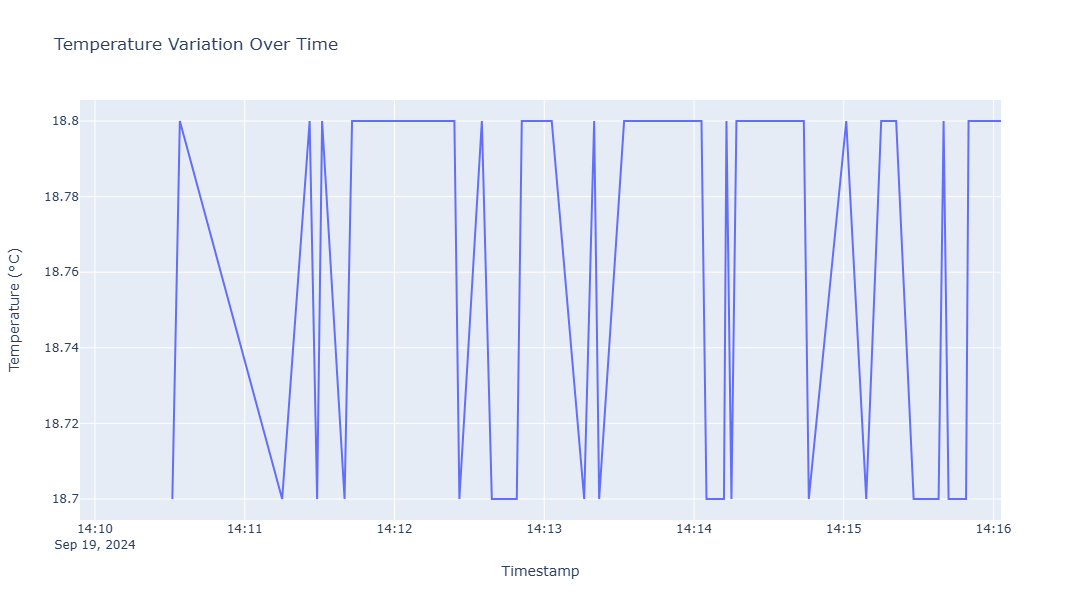

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [16]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
from datetime import datetime

# Load data from CSV
data_file = "temperature_humidity_power_data.csv"  # Updated CSV file name
df = pd.read_csv(data_file)

# Number of samples for each plot (N)
N = 1000

# Initialize buffers
incoming_buffer_temp = df['Temperature'].tolist()
incoming_buffer_power = df['Power Consumption'].tolist()
timestamp_buffer = df['Timestamp'].tolist()

# Plotting buffers
plot_buffer_temp = []
plot_buffer_power = []
plot_timestamp_buffer = []

def update_plot_buffer():
    global plot_buffer_temp, plot_buffer_power, plot_timestamp_buffer
    # Take N samples from incoming buffers
    plot_buffer_temp = incoming_buffer_temp[:N]
    plot_buffer_power = incoming_buffer_power[:N]
    plot_timestamp_buffer = timestamp_buffer[:N]
    
    # Remove the samples from the incoming buffers
    del incoming_buffer_temp[:N]
    del incoming_buffer_power[:N]
    del timestamp_buffer[:N]

def plot_data():
    fig = go.Figure()
    
    # Plot Temperature
    fig.add_trace(go.Scatter(x=plot_timestamp_buffer, y=plot_buffer_temp, mode='lines', name='Temperature'))
    
    # Plot Power Consumption
    fig.add_trace(go.Scatter(x=plot_timestamp_buffer, y=plot_buffer_power, mode='lines', name='Power Consumption', line=dict(dash='dot')))
    
    # Customize layout
    fig.update_layout(
        title="Temperature and Power Consumption Over Time",
        xaxis_title="Timestamp",
        yaxis_title="Value",
        autosize=False,
        width=800,
        height=600,
    )
    
    fig.show()

def save_plot_and_data():
    # Save the plot with a timestamped filename
    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    fig.write_image(f"temperature_power_plot_{timestamp}.png")
    
    # Save corresponding data to CSV
    plot_data_df = pd.DataFrame({
        "Timestamp": plot_timestamp_buffer,
        "Temperature": plot_buffer_temp,
        "Power Consumption": plot_buffer_power
    })
    plot_data_df.to_csv(f"temperature_power_data_{timestamp}.csv", index=False)

# Continuously update the plot with new data
while len(incoming_buffer_temp) >= N:
    update_plot_buffer()
    plot_data()  # Plot new data
    save_plot_and_data()  # Save plot and data

# If there are fewer than N samples left, plot them anyway
if len(incoming_buffer_temp) > 0:
    update_plot_buffer()
    plot_data()
    save_plot_and_data()
